In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#modo de abrir os arquivos parquet (engine)
!pip install pyarrow 
#biblioteca para manipulação e visualização dos dados em formato "tabelar"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# definindo  os diretórios que podemos trabalhar:

#### obs: a definição abaixo funciona somente aqui no colab, se for trabalhar no jupyter podemos fazer assim acho: caminho_arquivo = r'diretorio/onde/esta/arquivo' 

In [3]:
dir_inss = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/inss_beneficios/
# dir_cnes = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_cnes_estabelecimentos/
# dir_ibge = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_ibge_municipio/
# dir_sigtap = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sigtap_cid/
# dir_sigtap_proc = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sigtap_procedimento/
# dir_sih = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sih_rd/
# dir_sia = %cd drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sia_pa/

/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/inss_beneficios


In [4]:
%ls

df_l20_inss.csv                     INSS_beneficios_indeferidos.parquet
INSS_beneficios_concedidos.parquet


In [5]:
%%time
df = pd.read_parquet('INSS_beneficios_concedidos.parquet', engine='pyarrow')

CPU times: user 18.3 s, sys: 7.15 s, total: 25.4 s
Wall time: 18.7 s


In [6]:
df20 = df[df['CID'].str.contains('L20')].reset_index()

In [7]:
df20 = df20.drop(['index'], axis=1)

In [8]:
df20.columns

Index(['Competência concessão', 'Espécie', 'CID', 'CID.1', 'Despacho',
       'Dt Nascimento', 'Sexo.', 'Clientela', 'Mun Resid',
       'Vínculo dependentes', 'Forma Filiação', 'UF', 'Qt SM RMI', 'CID_1'],
      dtype='object')

In [9]:
df20.head()

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,CID_1
0,201901,Amp. Social Pessoa Portadora Deficiencia,L209,L20.9 Dermatite Atopica Ne,Concessao Normal,20/10/2005,Masculino,Urbano,05043-CE-Crato,Não Informado,Desempregado,Ceará,"1,000",None
1,201901,Auxílio Doenca Previdenciário,L20,L20 Dermatite Atopica,Concessao Normal,04/11/1960,Masculino,Urbano,20211-SC-Timbó Grande,Não Informado,Desempregado,Santa Catarina,"1,260",None
2,201901,Auxílio Doenca Previdenciário,L20,L20 Dermatite Atopica,Concessao Normal,20/10/1985,Feminino,Urbano,04364-BA-Teixeira de Freitas,Não Informado,Doméstico,Bahia,"1,000",None
3,201901,Auxílio Doenca Previdenciário,L209,L20.9 Dermatite Atopica Ne,Concessao Normal,29/04/1984,Feminino,Urbano,08087-GO-Goiânia,Filho,Desempregado,Goiás,"1,003",None
4,201901,Auxílio Doenca Previdenciário,L20,L20 Dermatite Atopica,Concessao Normal,26/10/1967,Feminino,Urbano,17064-RJ-Rio de Janeiro,Não Informado,Desempregado,Rio de Janeiro,"1,116",None


In [10]:
df.groupby(['CID']).count()

,Competência concessão,Espécie,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,CID_1
CID,,,,,,,,,,,,,
,377056,377056,161866,377056,377056,377056,264254,377056,377056,377056,377056,377056,215190
0,2,2,2,2,2,2,0,2,2,2,2,2,0
0000,9,9,7,9,9,9,6,9,9,9,9,9,2
000000,5765896,5765896,2510290,5765896,5765893,5765896,3872656,5765896,5765896,5765896,5765896,5765896,3255606
000A15,1,1,1,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
z990,1,1,0,1,1,1,1,1,1,1,1,1,1
z991,1,1,0,1,1,1,1,1,1,1,1,1,1
z992,13,13,0,13,13,13,13,13,13,13,13,13,13


# Quantos pacientes no total (que receberam auxilio) moram em ambiente urbano e rural? sem ser com L20 ou L40

In [11]:
df.Clientela.value_counts(1)

Urbano    0.853072
Rural     0.146928
Name: Clientela, dtype: float64

# já existe um viés aqui, ou seja, na verdade vemos mais pacientes urbanos do que rurais para os casos de L20 e L40 porque a maioria das pessoas que receberam auxilio já estão em ambiente urbano.

# qual a porcentagem de pacientes com l20 ou l40 que receberam o auxílio?

In [12]:
df[df['CID'].str.contains('L20')].reset_index()

,index,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,CID_1
0,2195,201901,Amp. Social Pessoa Portadora Deficiencia,L209,L20.9 Dermatite Atopica Ne,Concessao Normal,20/10/2005,Masculino,Urbano,05043-CE-Crato,Não Informado,Desempregado,Ceará,"1,000",None
1,16259,201901,Auxílio Doenca Previdenciário,L20,L20 Dermatite Atopica,Concessao Normal,04/11/1960,Masculino,Urbano,20211-SC-Timbó Grande,Não Informado,Desempregado,Santa Catarina,"1,260",None
2,28613,201901,Auxílio Doenca Previdenciário,L20,L20 Dermatite Atopica,Concessao Normal,20/10/1985,Feminino,Urbano,04364-BA-Teixeira de Freitas,Não Informado,Doméstico,Bahia,"1,000",None
3,35078,201901,Auxílio Doenca Previdenciário,L209,L20.9 Dermatite Atopica Ne,Concessao Normal,29/04/1984,Feminino,Urbano,08087-GO-Goiânia,Filho,Desempregado,Goiás,"1,003",None
4,56950,201901,Auxílio Doenca Previdenciário,L20,L20 Dermatite Atopica,Concessao Normal,26/10/1967,Feminino,Urbano,17064-RJ-Rio de Janeiro,Não Informado,Desempregado,Rio de Janeiro,"1,116",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,365885,202104,Amp. Social Pessoa Portadora Deficiencia,L20,None,Concessao Normal,04/08/2018,Masculino,Urbano,19023-RS-Bom Jesus,Não Informado,Desempregado,Pará,1,L20 Dermatite Atopica
467,370752,202104,Auxílio Doenca Previdenciário,L20,None,Concessao Normal,25/07/1966,Feminino,Urbano,14103-PR-Iporã,Não Informado,Desempregado,Paraná,1,L20 Dermatite Atopica
468,393545,202104,Auxílio Doenca Previdenciário,L209,None,Concessao Normal,09/02/1981,Masculino,Urbano,21504-SP-São Paulo,Não Informado,Empregado,Santa Catarina,"1,849",L20.9 Dermatite Atopica Ne
469,426600,202104,Amp. Social Pessoa Portadora Deficiencia,L20,None,Concessao Normal,14/03/2018,Feminino,Urbano,25009-AP-Tartarugalzinho,Não Informado,Desempregado,Distrito Federal,1,L20 Dermatite Atopica


In [13]:
df.groupby(df['CID'].str.contains('L20')).count() 

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,CID_1
CID,,,,,,,,,,,,,,
False,11630667,11630667,11630667,5205519,11630667,11630657,11630667,7966215,11630667,11630667,11630667,11630667,11630667,6425148
True,471,471,471,304,471,471,471,278,471,471,471,471,471,167


In [14]:
df.groupby(df['CID'].str.contains('L40')).count()

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,CID_1
CID,,,,,,,,,,,,,,
False,11629025,11629025,11629025,5204445,11629025,11629015,11629025,7965267,11629025,11629025,11629025,11629025,11629025,6424580
True,2113,2113,2113,1378,2113,2113,2113,1226,2113,2113,2113,2113,2113,735


In [15]:
df40 = df[df['CID'].str.contains('L40')]
df20 = df[df['CID'].str.contains('L20')]

In [16]:
df_l20_l40 = pd.merge(df40,df20, how= 'outer')

In [17]:
total = df.shape[0]

In [18]:
especifico = df_l20_l40.shape[0]

In [19]:
porcentagem = (df20.shape[0]/total)*100
print(round(porcentagem,3))

0.004


In [20]:
porcentagem = (especifico/total)*100
print(round(porcentagem,3))

0.022


# Somente 0,02 % dos que receberam auxilio do INSS possuem o CID de L20 ou L40 

In [21]:
#df.head(20)

# quais pacientes receberam o auxílio doença com cid contendo "L40" ?

In [22]:
df_da_inss = df[df['CID'].str.contains('L40')]

In [23]:
df_da_inss.shape

(2113, 14)

In [24]:
df_da_inss['Clientela'].value_counts(1)

Urbano    0.8646
Rural     0.1354
Name: Clientela, dtype: float64

# quais pacientes receberam o auxílio doença com cid contendo "L20" ?

In [25]:
df_da_inss = df[df['CID'].str.contains('L20')]
df_da_inss['Clientela'].value_counts(1)

Urbano    0.942446
Rural     0.057554
Name: Clientela, dtype: float64

# não temos uma diferença muito grande entre representatividade feminina ou masculina para L20 ou L40

In [26]:
df_da_inss = df[df['CID'].str.contains('L20')]
df_da_inss['Sexo.'].value_counts(1)

Feminino     0.532909
Masculino    0.467091
Name: Sexo., dtype: float64

In [27]:
df_da_inss = df[df['CID'].str.contains('L40')]
df_da_inss['Sexo.'].value_counts(1)

Masculino    0.526739
Feminino     0.473261
Name: Sexo., dtype: float64

In [28]:
# idade minima homens 65
# idade minima mulheres 62 

In [29]:
df_l20 = df[df['CID'].str.contains('L20')]

In [30]:
datas_l20 = df_l20['Competência concessão'].values

In [31]:
len(datas_l20)

471

In [32]:
str_array = []

for data in datas_l20:
  data = str(data)
  if data.startswith('2015'):
    n_data = '2015'
    str_array.append(n_data)
  elif data.startswith('2016'):
    n_data = '2016'
    str_array.append(n_data)
  elif data.startswith('2017'):
    n_data = '2017'
    str_array.append(n_data)
  elif data.startswith('2018'):
    n_data = '2018'
    str_array.append(n_data)
  elif data.startswith('2019'):
    n_data = '2019'
    str_array.append(n_data)
  elif data.startswith('2020'):
    n_data = '2020'
    str_array.append(n_data)
  elif data.startswith('2021'):
    n_data = '2021'
    str_array.append(n_data)

In [33]:
df_l20['Competência concessão'] = str_array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_l20 = df_l20.reset_index()

In [35]:
df_l20['Dt Nascimento'][0]

'20/10/2005'

In [36]:
df_l20['Competência concessão'][0]

'2019'

In [37]:
pd.to_datetime(df_l20['Dt Nascimento'])

0     2005-10-20
1     1960-04-11
2     1985-10-20
3     1984-04-29
4     1967-10-26
         ...    
466   2018-04-08
467   1966-07-25
468   1981-09-02
469   2018-03-14
470   1984-08-03
Name: Dt Nascimento, Length: 471, dtype: datetime64[ns]

In [38]:
idade = round((pd.to_datetime(df_l20['Competência concessão']) - pd.to_datetime(df_l20['Dt Nascimento']))/ np.timedelta64(1, 'Y'))

In [39]:
df_l20['idade'] = idade

In [40]:
cols = ['index','CID', 'CID.1', 'Despacho','Dt Nascimento', 'Clientela', 'Mun Resid', 'Vínculo dependentes', 'Forma Filiação', 'UF', 'CID_1']
df_l20_inss = df_l20.drop(cols, axis=1)

In [41]:
df_l20_inss = df_l20_inss.rename(columns={'Competência concessão': 'DATA'})

In [42]:
new_data = [str(data) for data in df_l20_inss['DATA']]
df_l20_inss['DATA'] = new_data

In [43]:
len(new_data)

471

In [44]:
df_l20_inss['DATA'][:12]

0     2019
1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
Name: DATA, dtype: object

In [45]:
df_l20_inss['DATA'].unique()

array(['2019', '2020', '2021'], dtype=object)

In [46]:
# valores de salário dos anos presentes na tabela INSS

# 2019 = R$ 998,00
# 2020 = R$ 1.042,00
# 2021 = R$ 1.100,00

In [47]:
salario = []

for data in df_l20_inss['DATA'].values:
  if data == '2019':
    salario.append(float(998))
  elif data == '2020':
    salario.append(float(1042))
  elif data == '2021':
    salario.append(float(1100))

df_l20_inss['salario'] = salario

In [48]:
df_l20_inss.head()

,DATA,Espécie,Sexo.,Qt SM RMI,idade,salario
0,2019,Amp. Social Pessoa Portadora Deficiencia,Masculino,"1,000",13.0,998.0
1,2019,Auxílio Doenca Previdenciário,Masculino,"1,260",59.0,998.0
2,2019,Auxílio Doenca Previdenciário,Feminino,"1,000",33.0,998.0
3,2019,Auxílio Doenca Previdenciário,Feminino,"1,003",35.0,998.0
4,2019,Auxílio Doenca Previdenciário,Feminino,"1,116",51.0,998.0


In [49]:
!pip install fastnumbers

In [50]:
from fastnumbers import fast_real

rmi_ast = []

for rmi in df_l20_inss['Qt SM RMI'].values:
  rmi_ast.append(fast_real(rmi))

In [51]:
new_rmi_ast = []

for valor in rmi_ast:
  if type(valor) == int:
    new_rmi_ast.append(float(valor))
  else:
    new_rmi_ast.append(float(valor.replace(',','.')))

In [52]:
df_l20_inss['Qt SM RMI'] = new_rmi_ast

In [53]:
df_l20_inss.head()

,DATA,Espécie,Sexo.,Qt SM RMI,idade,salario
0,2019,Amp. Social Pessoa Portadora Deficiencia,Masculino,1.000,13.0,998.0
1,2019,Auxílio Doenca Previdenciário,Masculino,1.260,59.0,998.0
2,2019,Auxílio Doenca Previdenciário,Feminino,1.000,33.0,998.0
3,2019,Auxílio Doenca Previdenciário,Feminino,1.003,35.0,998.0
4,2019,Auxílio Doenca Previdenciário,Feminino,1.116,51.0,998.0


In [54]:
df_l20_inss['valor_aposentadoria'] = df_l20_inss['Qt SM RMI'] * df_l20_inss['salario']

In [55]:
df_l20_inss = df_l20_inss.drop(['Qt SM RMI','salario'], axis = 1)

In [56]:
df_l20_inss.head()

,DATA,Espécie,Sexo.,idade,valor_aposentadoria
0,2019,Amp. Social Pessoa Portadora Deficiencia,Masculino,13.0,998.000
1,2019,Auxílio Doenca Previdenciário,Masculino,59.0,1257.480
2,2019,Auxílio Doenca Previdenciário,Feminino,33.0,998.000
3,2019,Auxílio Doenca Previdenciário,Feminino,35.0,1000.994
4,2019,Auxílio Doenca Previdenciário,Feminino,51.0,1113.768


In [57]:
df2019 = df_l20_inss[df_l20_inss['DATA'] == '2019']

In [58]:
df2020 = df_l20_inss[df_l20_inss['DATA'] == '2020']

In [59]:
df2021 = df_l20_inss[df_l20_inss['DATA'] == '2021']

In [60]:
row19 = df2019['valor_aposentadoria'].sum()

In [61]:
row20 = df2020['valor_aposentadoria'].sum()

In [62]:
row21 = df2021['valor_aposentadoria'].sum()

In [63]:
ano = ['2019', '2020', '2021']
custo = [round(row19,2), round(row20,2), round(row21,2)]

grafico_inss = pd.DataFrame(list(zip(ano, custo)), columns=["Ano","Custo"])

In [64]:
custo

[402914.56, 134289.83, 92390.1]

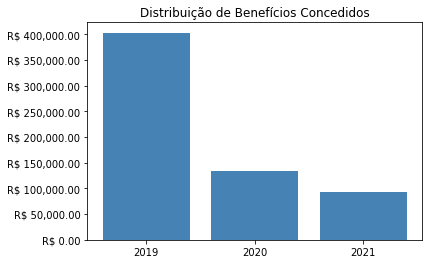

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

total_inss = grafico_inss.Custo
label_ano = grafico_inss.Ano

fig, axinss = plt.subplots()

axinss.bar(label_ano, total_inss, color = 'steelblue')

ylb1g = ['R$ '+'{:,.2f}'.format(custo) for custo in axinss.get_yticks()]
axinss.set_yticklabels(ylb1g)

axinss.set_title('Distribuição de Benefícios Concedidos')
df_l20_inss.head()
plt.show()

# Dataframe que contém todos os pacientes com L20 na base do INSS:

In [73]:
df_l20_inss.shape

(471, 5)

In [74]:
df_l20_fem = df_l20_inss[df_l20_inss['Sexo.'] == 'Feminino']

In [75]:
df_l20_fem.shape

(251, 5)

In [76]:
df_l20_masc = df_l20_inss[df_l20_inss['Sexo.'] == 'Masculino']

In [77]:
df_l20_masc.shape

(220, 5)

In [84]:
masc_med = round(df_l20_masc['idade'].mean()) # idade média dos homens na base

In [87]:
65 - masc_med

24

In [89]:
fem_med = round(df_l20_fem['idade'].mean()) # idade média das mulheres na base

36

In [88]:
62 - fem_med

26